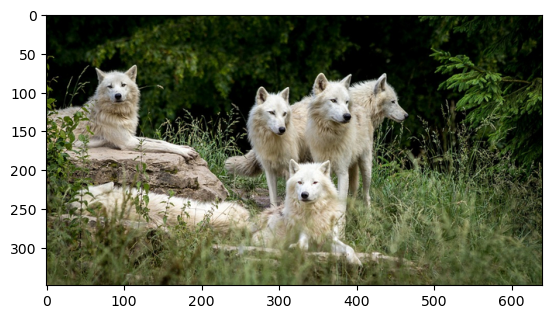

In [ ]:
# coba cari tahu tentang beberapa function berikut ini, 
# digunakan untuk apa, dan apa saja paremeternya?
# cv2.TM_CCOEFF = Correlation Coefficient: Menghitung koefisien korelasi antara template 
#                 dan area gambar input. Ini mempertimbangkan rata-rata pixel untuk menghilangkan 
#                 perbedaan intensitas global
# cv2.TM_CCOEFF_NORMED = Correlation Coefficient Normalized: mampu mengatasi perbedaan intensitas 
#                 cahaya dan kontras
# cv2.TM_CCORR = Cross Correlation: Menghitung produk titik (dot product) antara template 
#                 dan area gambar input Nilai yang lebih besar menunjukan kecocokan yang lebih baik
# cv2.TM_CCORR_NORMED = Cross Correlation Normalized: Normalisasi untuk mengatasi 
#                 perbedaan intensitas cahaya
# cv2.TM_SQDIFF = Squared Differences: Menghitung jumlah kuadrat perbedaan 
#                 antara pixel-pixel template dengan pixel-pixel di area gambar input. 
#                 Nilai yang lebih kecil menunjukan kecocokan yang lebih baik. 
#                 0 berarti kecocokan sempurna.
# cv2.TM_SQDIFF_NORMED = Squared Differences Normalized : Proses normalisasi membantu mengatasi 
#                 perbedaan intensitas cahaya.

import cv2
import numpy as np
import matplotlib.pyplot as plt

full = cv2.imread('img/serigala.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

(56, 57, 3)

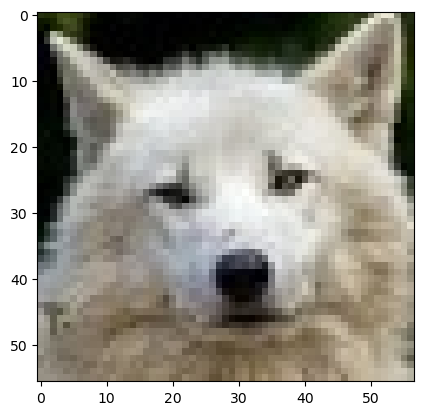

In [19]:
face = cv2.imread('img/serigala_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)
face.shape

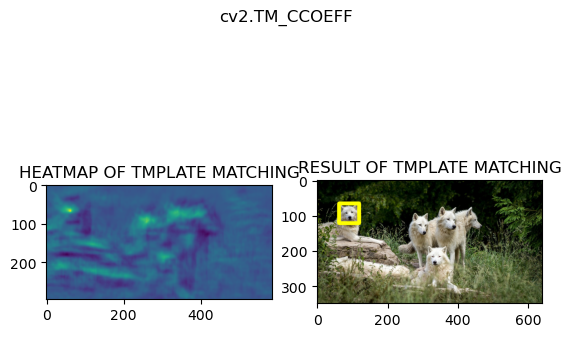

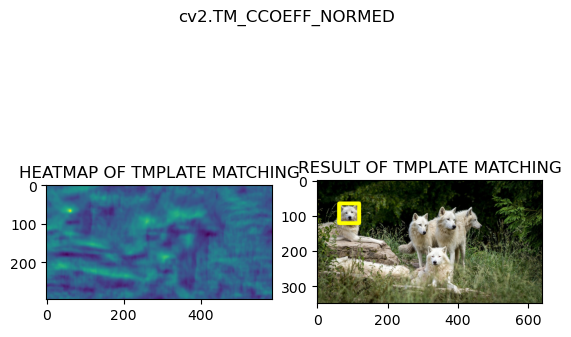

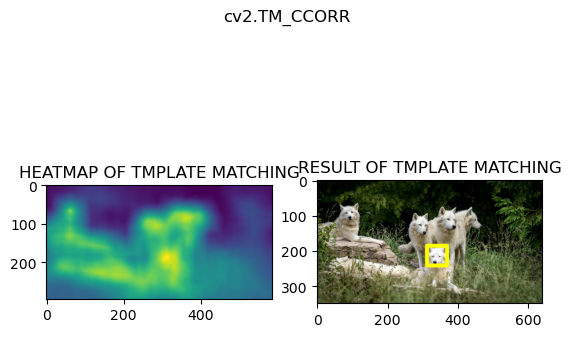

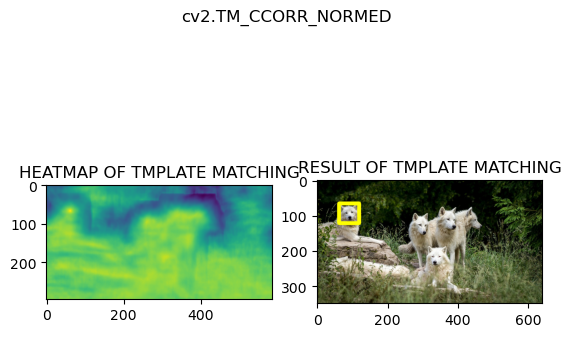

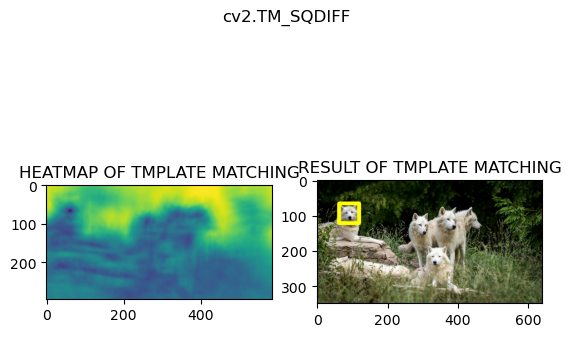

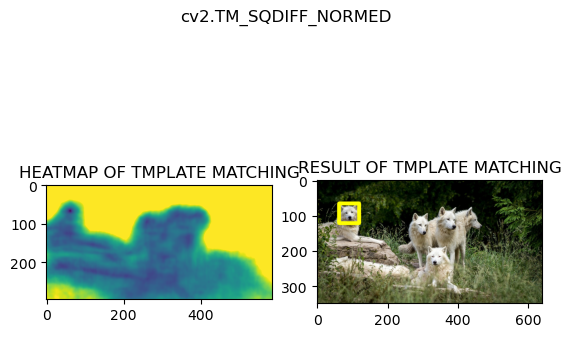

In [34]:
method = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
          'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for m in method:
    full_copy = full.copy()
    
    method = eval(m)
    # tempalate matching
    res = cv2.matchTemplate(full_copy, face, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # max_loc ini menggambarkan posisi atas pixel yg cocok antara template dengan gambar & intensitas tertinggi
    # berdarkan metode yang digunakan, uniknya dalam metode TM_SQDIFF, menggunakan min_loc
    if m in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
        top_left = min_loc
    else:
        top_left = max_loc
    height, width, channels = face.shape
    bottom_right = (top_left[0] + width, top_left[1] + height)
    cv2.rectangle(full_copy, top_left, bottom_right, (255, 255, 0), 10)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('RESULT OF TMPLATE MATCHING')
    plt.suptitle(m)
    
    plt.show()
    print('\n')